# Missing data visualization with "missingno"

#### Reference:

- [github.missingno](https://github.com/ResidentMario/missingno)

In [2]:
%matplotlib inline
import missingno as msno
import pandas as pd
import pandas.util.testing as tm

### data creation

In [6]:
# set dimmensions 
tm.N, tm.K = 500, 7
# it creates dataframe with missing values in it
df= pd.util.testing.makeMissingDataframe()
df.head()

,A,B,C,D,E,F,G
EZRcooqtVG,NaN,-1.769466,-1.190229,-0.687346,-0.812779,-0.467430,NaN
o0EcYmMdiQ,0.379452,-1.460923,0.377981,-1.011118,NaN,-0.014586,-1.852610
v56NEiw9C1,0.394168,-0.439597,1.079458,1.383133,0.857546,0.739563,-0.418327
JHueQIgHsJ,1.824591,-0.683143,NaN,1.141408,-0.131872,0.364894,-0.154622
BXzdxisllG,-0.071934,0.340618,-1.086039,0.615913,-0.376866,0.059936,-0.559154


In [8]:
# timeseries df
st = pd.util.testing.makeTimeDataFrame() * 100
st.head()

,A,B,C,D,E,F,G
2000-01-03,-44.518254,-89.383674,-127.867132,-84.515144,-9.698731,29.641838,107.412844
2000-01-04,1.747711,98.693657,-91.130662,98.029513,-202.359700,-18.102907,11.929990
2000-01-05,105.232105,-198.394303,3.878682,66.034593,-150.626077,26.468326,-86.388604
2000-01-06,137.525952,21.093120,-128.661998,128.863073,121.755776,-123.008141,65.904586
2000-01-07,48.449015,-36.069524,-51.088687,204.765833,114.301969,51.786837,-17.483624


## missing data visualization

### matrix

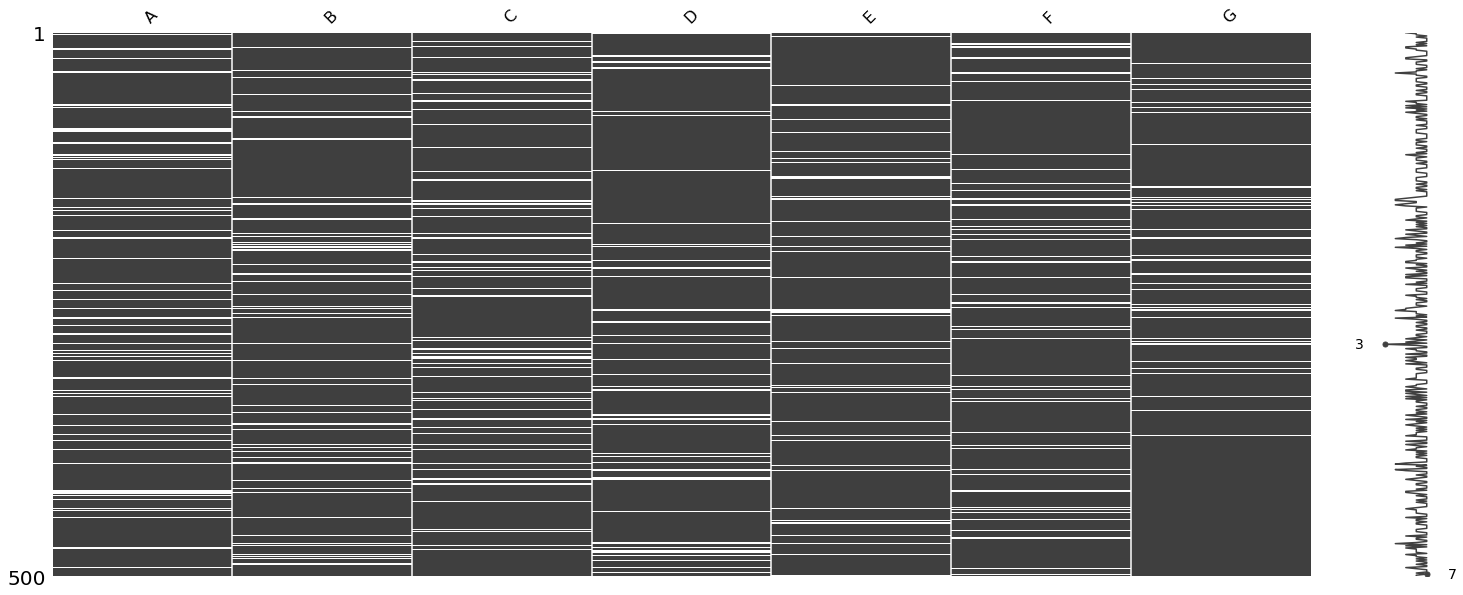

In [4]:
msno.matrix(df)

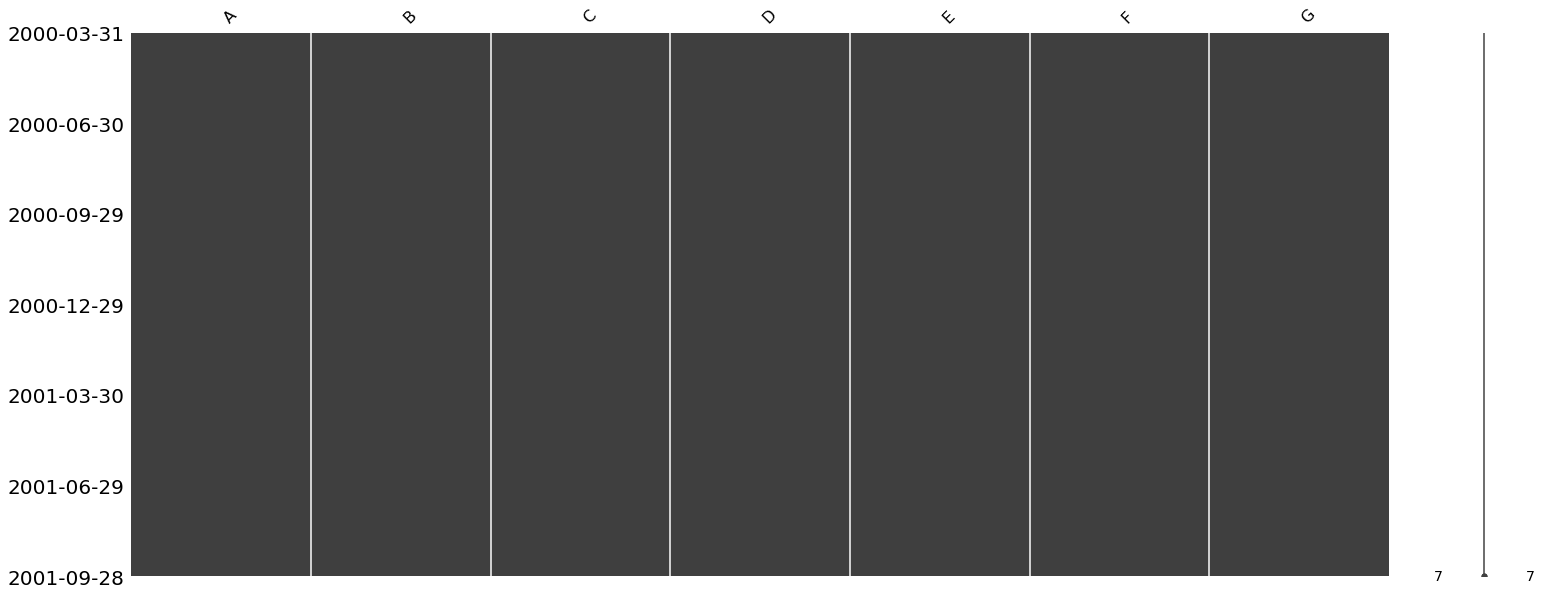

In [9]:
# matrix
msno.matrix(st , freq='BQ')

### bar chart

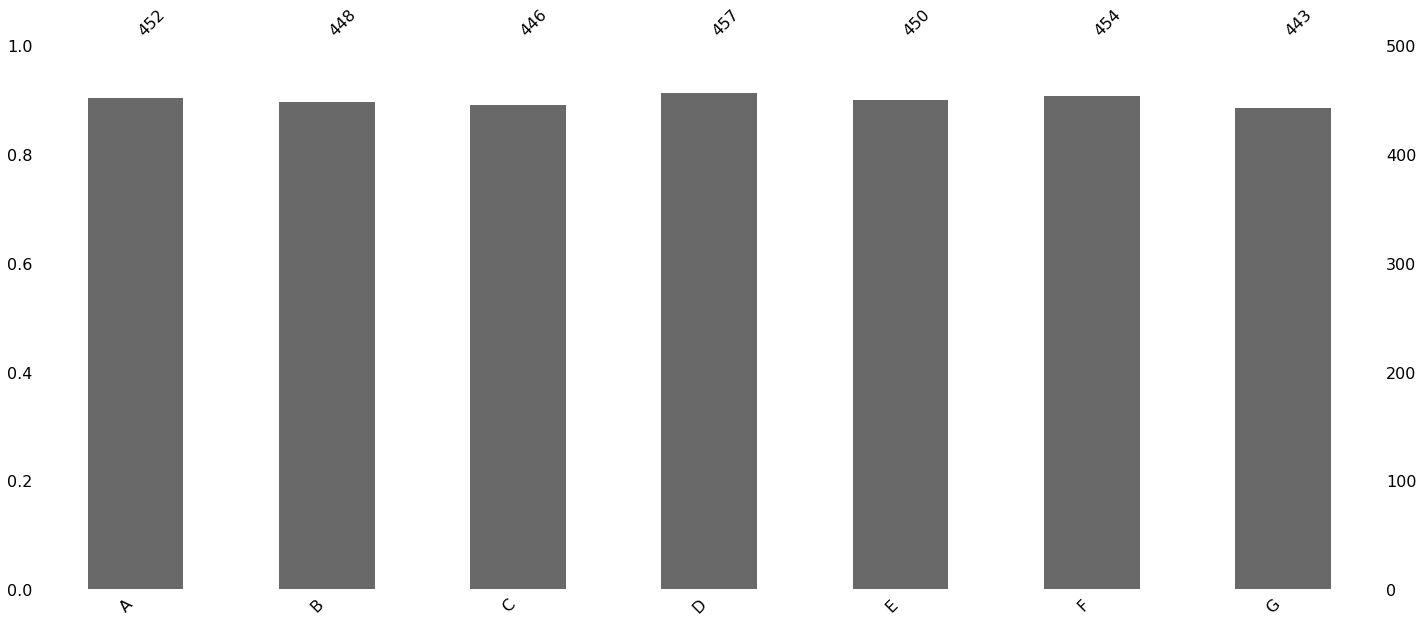

In [10]:
msno.bar(df)

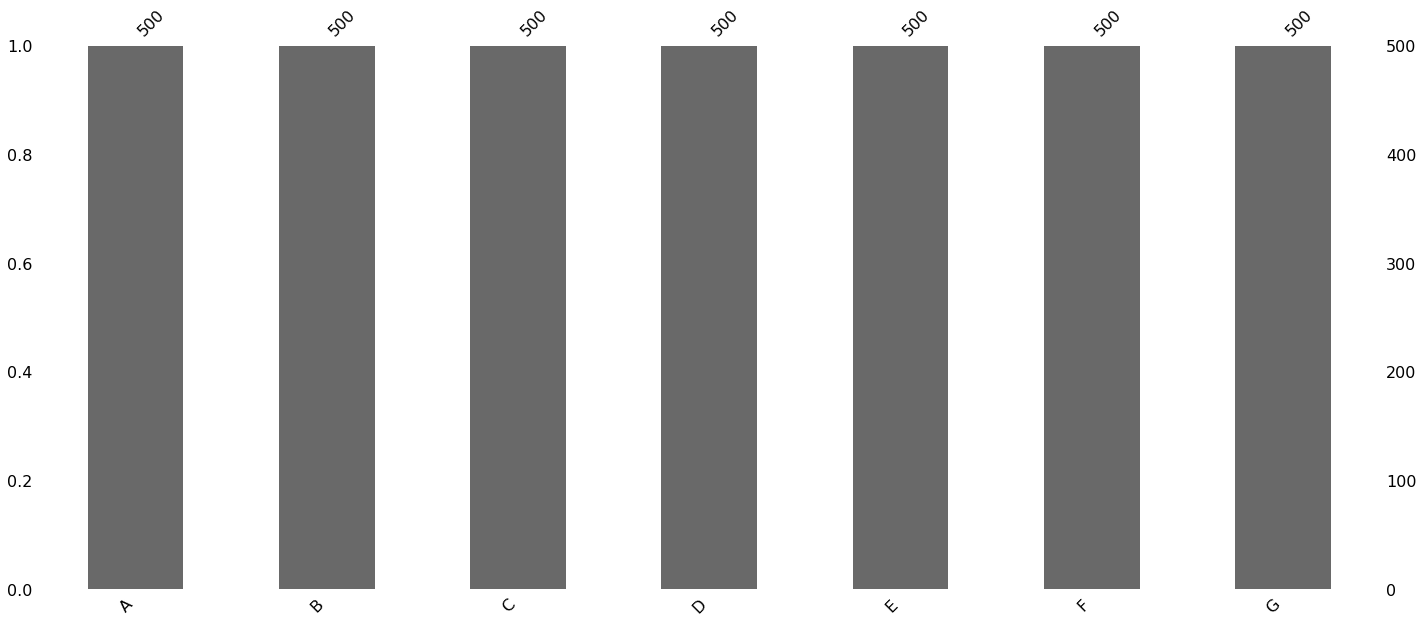

In [11]:
msno.bar(st)

### heatmap

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization—in this case for instance the datetime and injury number columns, which are completely filled, are not included.

Entries marked <1 or >-1 are have a correlation that is close to being exactingly negative or positive, but is still not quite perfectly so. This points to a small number of records in the dataset which are erroneous. In this [example](https://github.com/ResidentMario/missingno), in this dataset the correlation between VEHICLE CODE TYPE 3 and CONTRIBUTING FACTOR VEHICLE 3 is <1, indicating that, contrary to our expectation, there are a few records which have one or the other, but not both. These cases will require special attention.

The heatmap works great for picking out data completeness relationships between variable pairs, but its explanatory power is limited when it comes to larger relationships and it has no particular support for extremely large datasets.

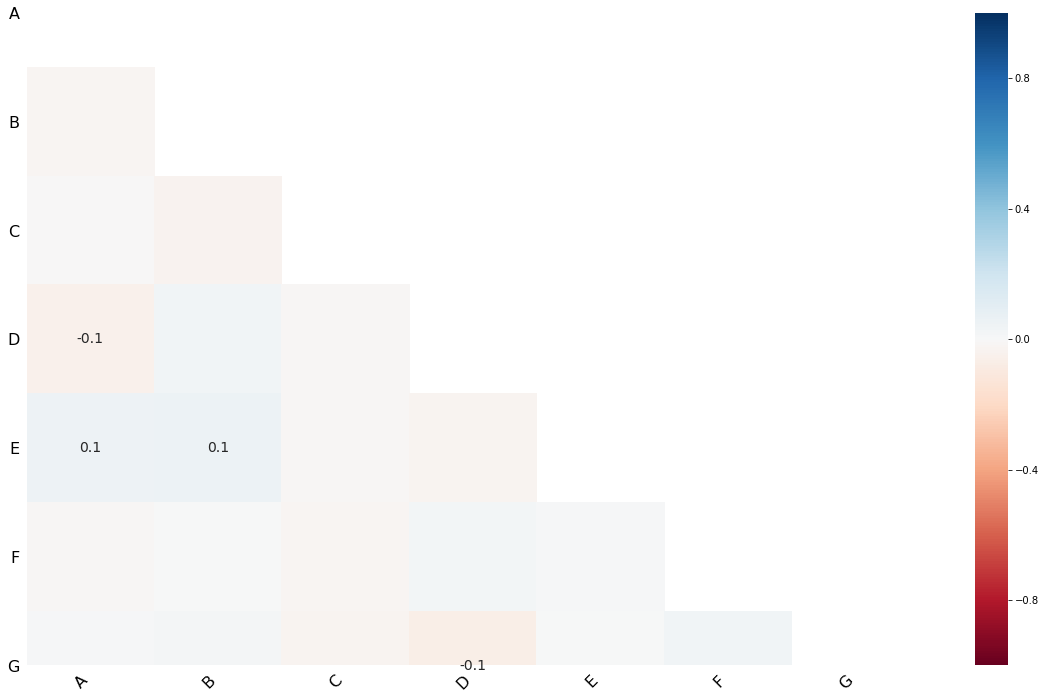

In [12]:
msno.heatmap(df)

### dendogram

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.

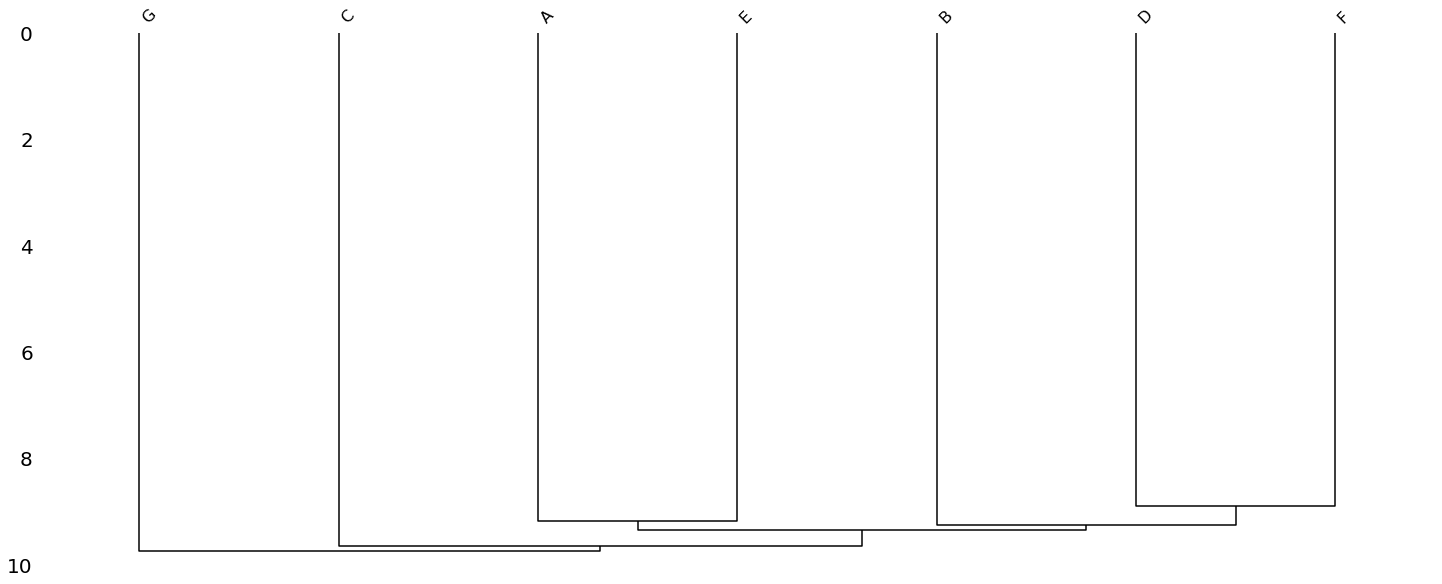

In [14]:
msno.dendrogram(df)